In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",50)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report,roc_auc_score,f1_score,roc_curve
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer,MissingIndicator,SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction import FeatureHasher

In [3]:
import re
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks
#from vishnu_utils import *
import vishnu_utils
from vishnu_utils import get_perf_metric,estimator_performance,logreg_coef,data_info

In [4]:
path = 'C:/vishnu/Data_Science/competitions/AV_JOB-A-THON'
!ls {path} 

__pycache__
JOB_A_THON_logreg_pipe.csv
JOB_A_THON_logreg_pipe_thr.csv
JOB-A-THON.ipynb
sample_submission_QrCyCoT.csv
test_YCcRUnU.csv
train_Df64byy.csv
vishnu_utils.py


In [5]:
train = pd.read_csv(f'{path}/train_Df64byy.csv')
test = pd.read_csv(f'{path}/test_YCcRUnU.csv')

print(f'train dimensions are : {train.shape} and test dimensions are : {test.shape}')
print(f'event rate in train data is {np.round(100*train.Response.sum()/train.Response.count(),4)}%')

train.head(2)
test.head(2)


train dimensions are : (50882, 14) and test dimensions are : (21805, 13)
event rate in train data is 23.9947%


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8


In [6]:
data_info(train)

,D_types,Null_count,Perc_Null_count,N_unique,+-Inf/Blank_count
ID,int64,0,0.00,50882,0
City_Code,object,0,0.00,36,0
Region_Code,int64,0,0.00,5316,0
Accomodation_Type,object,0,0.00,2,0
Reco_Insurance_Type,object,0,0.00,2,0
Upper_Age,int64,0,0.00,58,0
Lower_Age,int64,0,0.00,60,0
Is_Spouse,object,0,0.00,2,0
Health Indicator,object,11691,22.98,9,0
Holding_Policy_Duration,object,20251,39.80,15,0


In [7]:
data_info(test)

,D_types,Null_count,Perc_Null_count,N_unique,+-Inf/Blank_count
ID,int64,0,0.00,21805,0
City_Code,object,0,0.00,36,0
Region_Code,int64,0,0.00,4694,0
Accomodation_Type,object,0,0.00,2,0
Reco_Insurance_Type,object,0,0.00,2,0
Upper_Age,int64,0,0.00,58,0
Lower_Age,int64,0,0.00,60,0
Is_Spouse,object,0,0.00,2,0
Health Indicator,object,5027,23.05,9,0
Holding_Policy_Duration,object,8603,39.45,15,0


In [8]:
var = 'City_Code'
temp = train[var].value_counts(normalize=True)
pd.crosstab(index = train[var], columns = train.Response,margins = True,normalize='index',)
temp = pd.Series(temp[temp>= 0.005].index)
#temp
train[var] = np.where(train[var].isin(temp), train[var],'low_pop')
#train[var].value_counts(normalize=True)
test[var] = np.where(test[var].isin(temp), test[var],'low_pop')

train[f'{var}_event_rate'] = train[var].map(train.groupby(var).Response.mean())
test[f'{var}_event_rate'] = test[var].map(train.groupby(var).Response.mean()).fillna(0)

Response,0,1
City_Code,,
C1,0.753928,0.246072
C10,0.774053,0.225947
C11,0.756757,0.243243
C12,0.771889,0.228111
C13,0.746269,0.253731
C14,0.764075,0.235925
C15,0.786678,0.213322
C16,0.762996,0.237004
C17,0.771355,0.228645


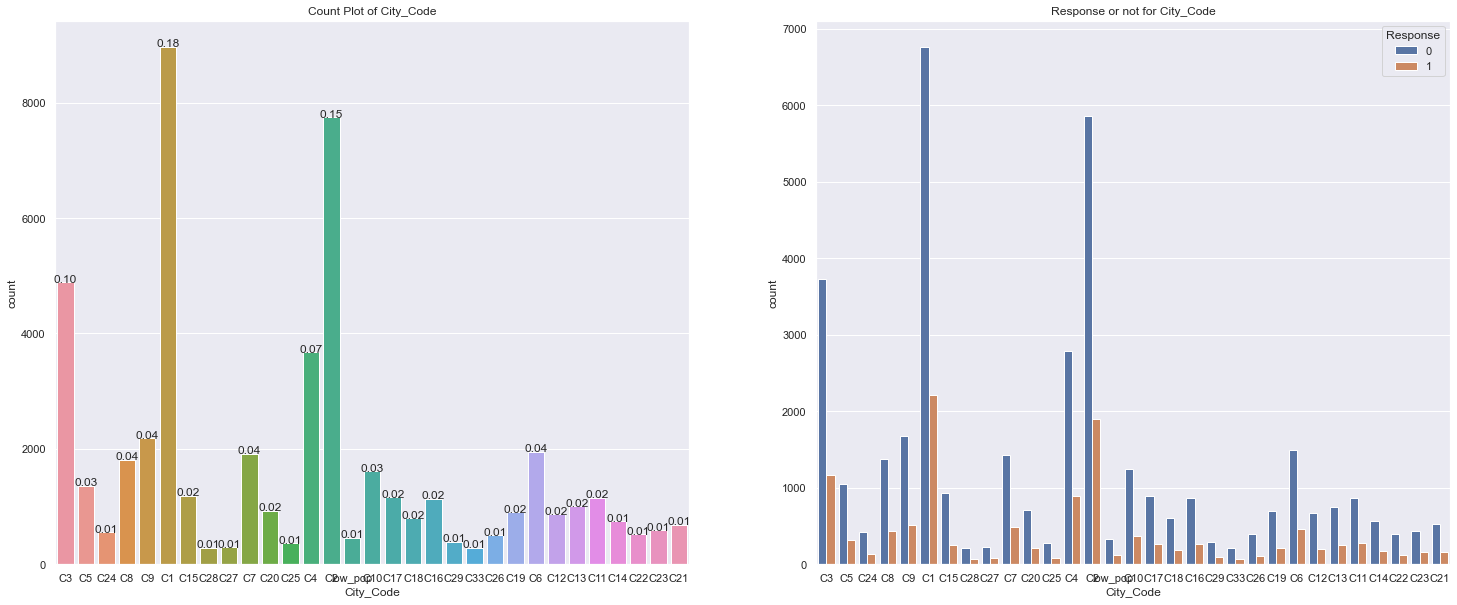

In [9]:
target = 'Response'; var = 'City_Code'
fig, axis = plt.subplots(1, 2, figsize = (25,10));
fig = sns.countplot(data = train, x=var,ax = axis[0]).set_title(f'Count Plot of {var}');
for p in axis[0].patches:
    height = p.get_height(); width = p.get_width();
    a = axis[0].text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/float(len(train))), ha="center"); 

sns.countplot(data = train, x=var,hue = target,ax = axis[1]).set_title(f'{target} or not for {var}');

In [10]:
train.Region_Code = train.Region_Code.astype('str')
test.Region_Code = test.Region_Code.astype('str')

nft_rc = 10; var = 'Region_Code'
cols_rc = [var + '_col'+ str(i) for i in range(nft_rc)] 
fh = FeatureHasher(n_features=nft_rc, input_type='string',alternate_sign =True)
fh_train = pd.DataFrame(fh.fit_transform(train[var]).toarray(),columns = cols_rc)
fh_test =  pd.DataFrame(fh.fit_transform(test[var]).toarray(),columns = cols_rc)

train[f'{var}_event_rate'] = train[var].map(train.groupby(var).Response.mean())
test[f'{var}_event_rate'] = test[var].map(train.groupby(var).Response.mean()).fillna(0)

In [11]:
var = 'Health Indicator'
#train[var].value_counts(dropna = False,normalize=True)
pd.crosstab(index = train[var].fillna('No Condn'), columns = train.Response,margins = True,normalize='index',)

train.fillna(value = {var : 'No Condition'}, inplace = True)
test.fillna(value = {var : 'No Condition'}, inplace = True)

train[f'{var}_event_rate'] = train[var].map(train.groupby(var).Response.mean())
test[f'{var}_event_rate'] = test[var].map(train.groupby(var).Response.mean()).fillna(0)


Response,0,1
Health Indicator,,
No Condn,0.765803,0.234197
X1,0.755880,0.244120
X2,0.758904,0.241096
X3,0.763531,0.236469
X4,0.756921,0.243079
X5,0.763752,0.236248
X6,0.760156,0.239844
X7,0.683673,0.316327
X8,0.769231,0.230769


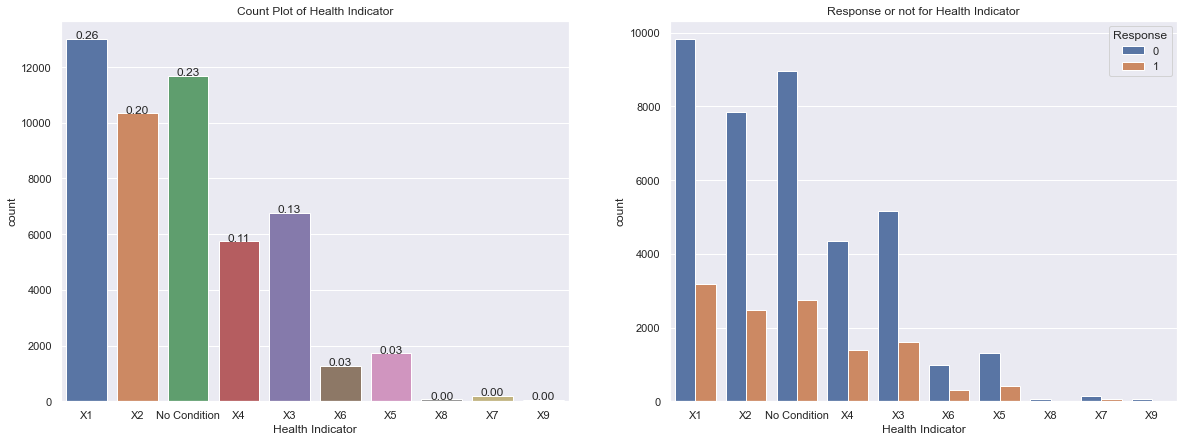

In [12]:
target = 'Response'; var = 'Health Indicator'
fig, axis = plt.subplots(1, 2, figsize = (20,7));
fig = sns.countplot(data = train, x=var,ax = axis[0]).set_title(f'Count Plot of {var}');
for p in axis[0].patches:
    height = p.get_height(); width = p.get_width();
    a = axis[0].text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/float(len(train))), ha="center"); 

sns.countplot(data = train, x=var,hue = target,ax = axis[1]).set_title(f'{target} or not for {var}');

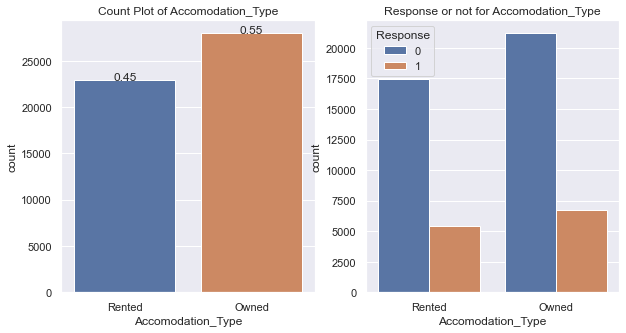

In [13]:
target = 'Response'; var = 'Accomodation_Type'
fig, axis = plt.subplots(1, 2, figsize = (10,5));
fig = sns.countplot(data = train, x=var,ax = axis[0]).set_title(f'Count Plot of {var}');
for p in axis[0].patches:
    height = p.get_height(); width = p.get_width();
    a = axis[0].text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/float(len(train))), ha="center"); 

sns.countplot(data = train, x=var,hue = target,ax = axis[1]).set_title(f'{target} or not for {var}');

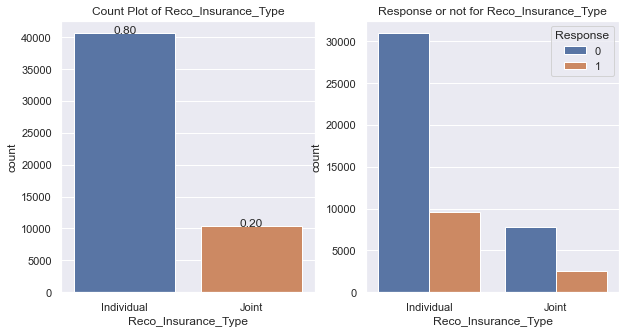

In [14]:
target = 'Response'; var = 'Reco_Insurance_Type'
fig, axis = plt.subplots(1, 2, figsize = (10,5));
fig = sns.countplot(data = train, x=var,ax = axis[0]).set_title(f'Count Plot of {var}');
for p in axis[0].patches:
    height = p.get_height(); width = p.get_width();
    a = axis[0].text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/float(len(train))), ha="center"); 

sns.countplot(data = train, x=var,hue = target,ax = axis[1]).set_title(f'{target} or not for {var}');

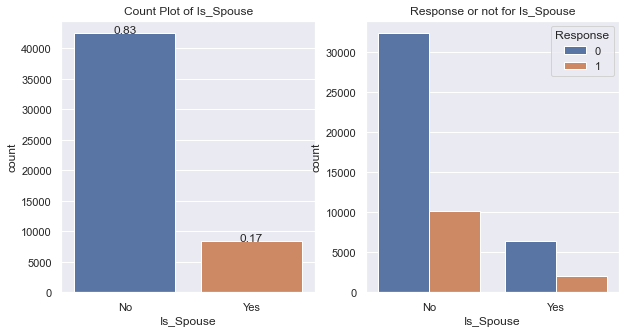

In [15]:
target = 'Response'; var = 'Is_Spouse'
fig, axis = plt.subplots(1, 2, figsize = (10,5));
fig = sns.countplot(data = train, x=var,ax = axis[0]).set_title(f'Count Plot of {var}');
for p in axis[0].patches:
    height = p.get_height(); width = p.get_width();
    a = axis[0].text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/float(len(train))), ha="center"); 

sns.countplot(data = train, x=var,hue = target,ax = axis[1]).set_title(f'{target} or not for {var}');

In [16]:
train['upper_lower_age_comp'] = 1*(train.Upper_Age == train.Lower_Age)
test['upper_lower_age_comp'] = 1*(test.Upper_Age == test.Lower_Age)
#train['no_existing_policy'] = 1*train.Holding_Policy_Duration.notnull()
#train.isin([np.inf, -np.inf]).sum()

In [17]:
var = 'Holding_Policy_Duration'
#train[var].value_counts(dropna = False,normalize=True)
pd.crosstab(index = train[var].fillna('No Policy'), columns = train.Response,margins = True,normalize='index',)

train.fillna(value = {var : '0.0'}, inplace = True)
test.fillna(value = {var : '0.0'}, inplace = True)

train[var] = np.where(train[var] == '14+', '15', train[var]).astype(np.float)
test[var] = np.where(test[var] == '14+', '15', test[var]).astype(np.float)

train[f'{var}_event_rate'] = train[var].map(train.groupby(var).Response.mean())
test[f'{var}_event_rate'] = test[var].map(train.groupby(var).Response.mean()).fillna(0)


Response,0,1
Holding_Policy_Duration,,
1.0,0.778395,0.221605
10.0,0.726937,0.273063
11.0,0.749084,0.250916
12.0,0.746589,0.253411
13.0,0.729941,0.270059
14+,0.749250,0.250750
14.0,0.753219,0.246781
2.0,0.762676,0.237324
3.0,0.767987,0.232013


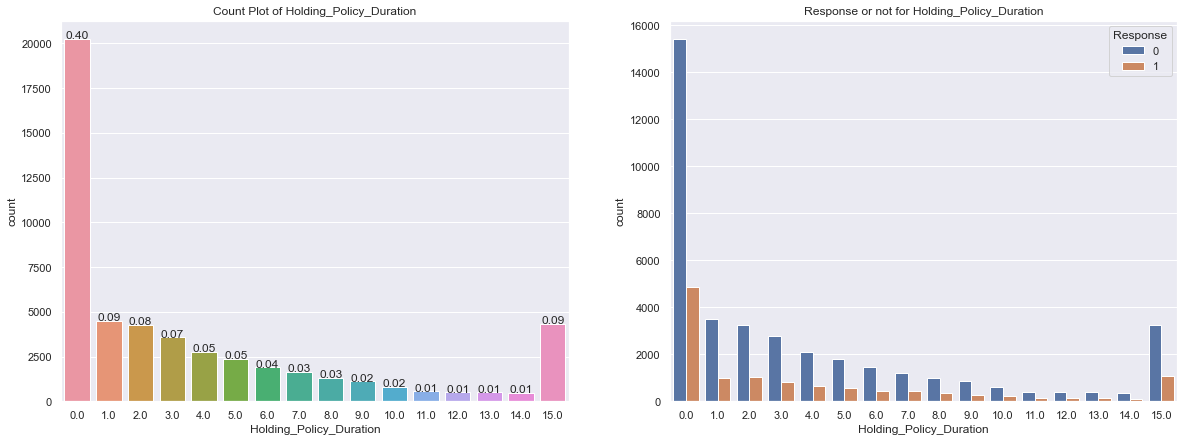

In [18]:
target = 'Response'; var = 'Holding_Policy_Duration'
fig, axis = plt.subplots(1, 2, figsize = (20,7));
fig = sns.countplot(data = train, x=var,ax = axis[0]).set_title(f'Count Plot of {var}');
for p in axis[0].patches:
    height = p.get_height(); width = p.get_width();
    a = axis[0].text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/float(len(train))), ha="center"); 

sns.countplot(data = train, x=var,hue = target,ax = axis[1]).set_title(f'{target} or not for {var}');

In [19]:
var = 'Holding_Policy_Type'
train[var] = train[var].fillna(-1).astype(str)
test[var] = test[var].fillna(-1).astype(str)

train[var].value_counts(dropna = False,normalize=True)
pd.crosstab(index = train[var].fillna('-1'), columns = train.Response,margins = True,normalize='index',)

train[f'{var}_event_rate'] = train[var].map(train.groupby(var).Response.mean())
test[f'{var}_event_rate'] = test[var].map(train.groupby(var).Response.mean()).fillna(0)


-1.0    0.397999
3.0     0.260976
1.0     0.160627
2.0     0.098365
4.0     0.082033
Name: Holding_Policy_Type, dtype: float64

Response,0,1
Holding_Policy_Type,,
-1.0,0.761049,0.238951
1.0,0.764224,0.235776
2.0,0.762238,0.237762
3.0,0.757738,0.242262
4.0,0.751797,0.248203
All,0.760053,0.239947


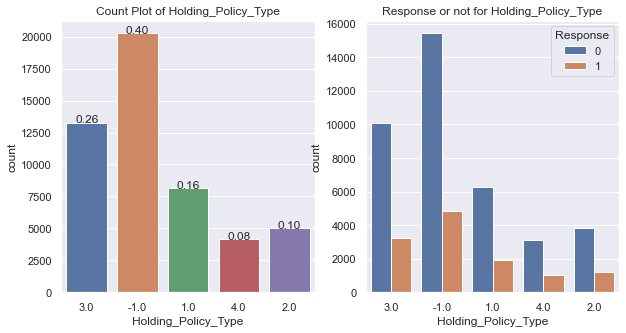

In [20]:
target = 'Response'; var = 'Holding_Policy_Type'
fig, axis = plt.subplots(1, 2, figsize = (10,5));
fig = sns.countplot(data = train, x=var,ax = axis[0]).set_title(f'Count Plot of {var}');
for p in axis[0].patches:
    height = p.get_height(); width = p.get_width();
    a = axis[0].text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/float(len(train))), ha="center"); 

sns.countplot(data = train, x=var,hue = target,ax = axis[1]).set_title(f'{target} or not for {var}');

In [21]:
var = 'Reco_Policy_Cat'
train[var] = train[var].astype(str)
test[var] = test[var].astype(str)
#train[var].value_counts(dropna = False,normalize=True)
pd.crosstab(index = train[var], columns = train.Response,margins = True,normalize='index',)

train[f'{var}_event_rate'] = train[var].map(train.groupby(var).Response.mean())
test[f'{var}_event_rate'] = test[var].map(train.groupby(var).Response.mean()).fillna(0)

Response,0,1
Reco_Policy_Cat,,
1,0.995933,0.004067
10,0.823377,0.176623
11,0.833547,0.166453
12,0.684963,0.315037
13,0.781473,0.218527
14,0.756028,0.243972
15,0.534365,0.465635
16,0.776445,0.223555
17,0.701544,0.298456


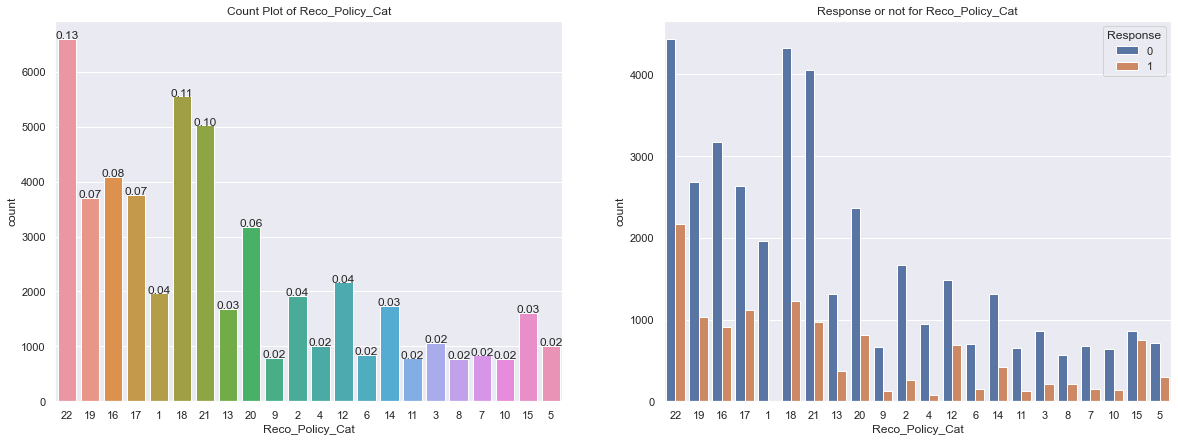

In [22]:
target = 'Response'; var = 'Reco_Policy_Cat'
fig, axis = plt.subplots(1, 2, figsize = (20,7));
fig = sns.countplot(data = train, x=var,ax = axis[0]).set_title(f'Count Plot of {var}');
for p in axis[0].patches:
    height = p.get_height(); width = p.get_width();
    a = axis[0].text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/float(len(train))), ha="center"); 

sns.countplot(data = train, x=var,hue = target,ax = axis[1]).set_title(f'{target} or not for {var}');

In [23]:
#train.head().select_dtypes(np.number).columns 
#['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = ['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration','Reco_Policy_Premium']

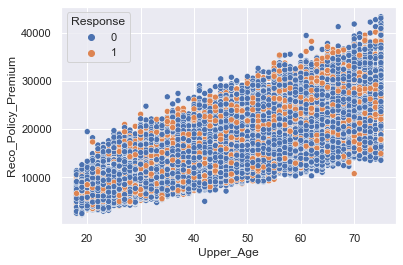

In [24]:
x = sns.scatterplot(x = 'Upper_Age', y = 'Reco_Policy_Premium',data = train, hue = target)

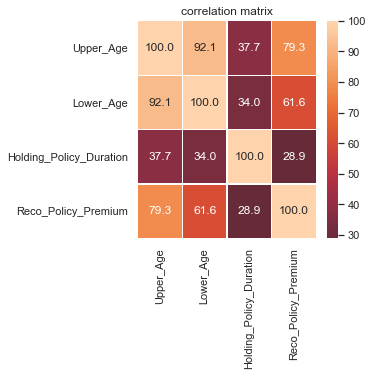

In [25]:
cor_mat = train[num_cols].corr()
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, ax = plt.subplots(figsize=(4,4)) ;
x = sns.heatmap(100*cor_mat, annot=True,fmt='.1f',center=0,linewidths = 0.25,).set_title('correlation matrix')
plt.show()

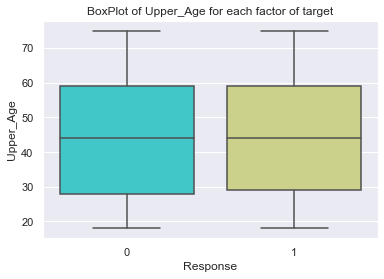

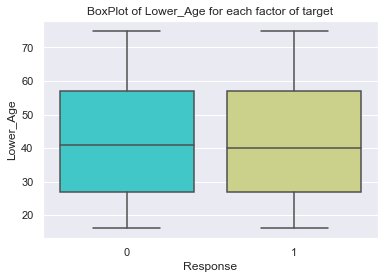

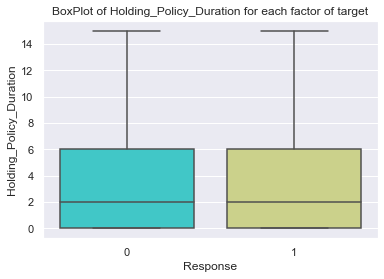

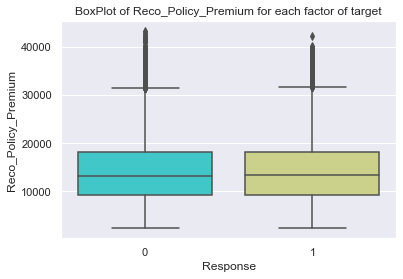

In [26]:
for i in num_cols:
    pfig = plt.figure();
    img = sns.boxplot(x= target,y=i,data=train,palette='rainbow').set_title(f'BoxPlot of {i} for each factor of target');
    fig = img.get_figure();
    #fig.savefig(i);
    #fig.clf(); # run this for not printing figure

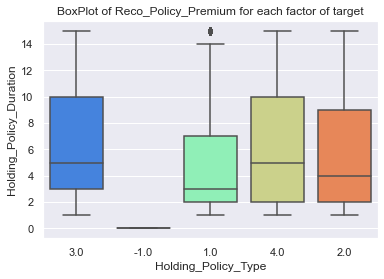

In [27]:
sns.boxplot(x= 'Holding_Policy_Type',y='Holding_Policy_Duration',data=train,palette='rainbow').set_title(f'BoxPlot of {i} for each factor of target');

In [28]:
#train.head().select_dtypes('O').columns #Columns for OHE
ohe_cols = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type','Reco_Policy_Cat']

In [29]:
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
ohe_train = pd.DataFrame(ohe.fit_transform(train[ohe_cols]),columns = ohe.get_feature_names(ohe_cols))
ohe_test = pd.DataFrame(ohe.transform(test[ohe_cols]),columns = ohe.get_feature_names(ohe_cols))


In [30]:
train_v2 =  pd.concat([train,fh_train,ohe_train], axis = 1).drop(ohe_cols,axis = 1)
test_v2 =  pd.concat([test,fh_test,ohe_test], axis = 1).drop(ohe_cols,axis = 1)

In [31]:
train_v2.shape, test_v2.shape
train_v2.columns

((50882, 98), (21805, 97))

Index(['ID', 'Region_Code', 'Upper_Age', 'Lower_Age',
       'Holding_Policy_Duration', 'Reco_Policy_Premium', 'Response',
       'City_Code_event_rate', 'Region_Code_event_rate',
       'Health Indicator_event_rate', 'upper_lower_age_comp',
       'Holding_Policy_Duration_event_rate', 'Holding_Policy_Type_event_rate',
       'Reco_Policy_Cat_event_rate', 'Region_Code_col0', 'Region_Code_col1',
       'Region_Code_col2', 'Region_Code_col3', 'Region_Code_col4',
       'Region_Code_col5', 'Region_Code_col6', 'Region_Code_col7',
       'Region_Code_col8', 'Region_Code_col9', 'City_Code_C1', 'City_Code_C10',
       'City_Code_C11', 'City_Code_C12', 'City_Code_C13', 'City_Code_C14',
       'City_Code_C15', 'City_Code_C16', 'City_Code_C17', 'City_Code_C18',
       'City_Code_C19', 'City_Code_C2', 'City_Code_C20', 'City_Code_C21',
       'City_Code_C22', 'City_Code_C23', 'City_Code_C24', 'City_Code_C25',
       'City_Code_C26', 'City_Code_C27', 'City_Code_C28', 'City_Code_C29',
       'City_C

In [32]:
x = train_v2.isin([np.inf, -np.inf, np.nan]).sum()
x[x>0]
x = test_v2.isin([np.inf, -np.inf, np.nan]).sum()
x[x>0]

Series([], dtype: int64)

Series([], dtype: int64)

In [33]:
target = 'Response'
features = [i for i in train_v2.columns if i not in ['ID', target, 'Region_Code']]
len(features)

95

In [34]:
X_train,X_test,y_train,y_test = train_test_split(train_v2[features],train_v2[target],stratify = train_v2[target],\
                                                 test_size=0.25, random_state=51)
X_train.shape, X_test.shape

((38161, 95), (12721, 95))

In [37]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="prior", random_state = 51)
dummy_clf.fit(X_train, y_train)

dummy_clf.score(X_train, y_train)
dummy_clf.score(X_test, y_test)

DummyClassifier(random_state=51, strategy='prior')

0.7600429758130028

0.7600817545790425

In [38]:
#'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'

In [39]:
#logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'none',solver = 'sag',random_state = 52, max_iter=10000,C= 1))
logreg_pipe = make_pipeline(MinMaxScaler(), LogisticRegression(solver = 'sag',random_state = 52, max_iter=10000,C= 0.079))
#'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'

In [40]:
logreg_pipe.fit(X_train[features], y_train);

In [41]:
%%time 
#running function to get various performance metrics
lr_performance = get_perf_metric(estimator =logreg_pipe,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,th = 0.5)

Wall time: 555 ms


In [42]:
lr_performance_df = lr_performance['perf_df']
lr_performance_df

Metric,gini,ks,roc_auc,precision,recall,f1_score,accuracy,TN,FP,FN,TP
Train,48.057626,34.301641,0.744544,0.631193,0.159987,0.255271,0.776002,28148.0,856.0,7692.0,1465.0
Test,45.955650,32.590299,0.733225,0.585695,0.142202,0.228843,0.770065,9362.0,307.0,2618.0,434.0


In [43]:
train_gini_table = lr_performance['train_gini_table']
test_gini_table = lr_performance['test_gini_table']

In [44]:
x = pd.concat([lr_performance['train_cf'],lr_performance['test_cf']], axis = 1)
x.columns = pd.MultiIndex.from_tuples([('Train', 'Predicted_0'),('Train', 'Predicted_1'),('Test', 'Predicted_0'),('Test', 'Predicted_1')])
x                                                                                                   

Train                    Test            
         Predicted_0 Predicted_1 Predicted_0 Predicted_1
Actual 0     28148.0       856.0      9362.0       307.0
       1      7692.0      1465.0      2618.0       434.0

In [45]:
logreg_coef(logreg_pipe[1],X_train[features]).head(15)

,variable,coefficient
0,intercept,-3.957103
1,Region_Code_event_rate,5.285559
2,Reco_Policy_Cat_1,-1.791957
3,Reco_Policy_Cat_event_rate,1.616414
4,Reco_Policy_Cat_4,-0.659767
5,Reco_Policy_Cat_15,0.380050
6,Reco_Policy_Cat_19,0.319228
7,Reco_Policy_Cat_22,0.304189
8,City_Code_C28,0.303389
9,Reco_Policy_Cat_17,0.293396


In [46]:
#import sklearn; sklearn.metrics.SCORERS.keys()
scoring_dict = {'acc': 'accuracy','roc': 'roc_auc',           'f1_score' : 'f1_macro',
           'prec_macro': 'precision_macro',           'rec_micro': 'recall_macro'}
skf = StratifiedKFold(n_splits=10,random_state = 54,)

lr_kfold_cv = cross_validate(estimator=logreg_pipe, X=train_v2[features], y=train_v2[target], cv=skf,scoring = scoring_dict, return_train_score= True)
for i in lr_kfold_cv.items():
    print(f"{i[0]} : %0.3f (+/- %0.3f)" % (i[1].mean(), i[1].std()*2))

fit_time : 1.969 (+/- 0.110)
score_time : 0.069 (+/- 0.011)
test_acc : 0.775 (+/- 0.007)
train_acc : 0.775 (+/- 0.001)
test_roc : 0.739 (+/- 0.011)
train_roc : 0.742 (+/- 0.001)
test_f1_score : 0.558 (+/- 0.021)
train_f1_score : 0.559 (+/- 0.002)
test_prec_macro : 0.702 (+/- 0.026)
train_prec_macro : 0.703 (+/- 0.003)
test_rec_micro : 0.563 (+/- 0.014)
train_rec_micro : 0.564 (+/- 0.002)


In [51]:
estimator = logreg_pipe; thr = 0.235435
lr_submission = test_v2[['ID']]
lr_submission['Response'] = 1*(estimator.predict_proba(test_v2[features])[:,1] > thr)
lr_submission.groupby('Response').ID.count()
#lr_submission.to_csv(f'{path}/JOB_A_THON_logreg_pipe_thr.csv', index=False)

Response
0    12531
1     9274
Name: ID, dtype: int64

### random forest

In [ ]:
RF = RandomForestClassifier(n_estimators=750,oob_score=True,max_depth=6,max_features= 'sqrt',min_samples_leaf= 2,
                           min_samples_split = 3,n_jobs = -1,random_state = 53,verbose = 2, criterion='gini')
RF = RandomForestClassifier(max_depth=8)

In [ ]:
RF.fit(X_train, y_train)

In [ ]:
%%time
#running function to get various performance metrics
rf_performance = get_perf_metric(estimator =RF,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,th = 0.5)

In [ ]:
rf_performance_df = rf_performance['perf_df']
rf_performance_df

In [ ]:
estimator = logreg_pipe
lr_submission = test_v2[['ID']]
lr_submission['Response'] = estimator.predict(test_v2[features])
lr_submission.groupby('Response').ID.count()

In [ ]:
#import sklearn; sklearn.metrics.SCORERS.keys()
rf1 = RandomForestClassifier(max_depth=8)
scoring_dict = {'acc': 'accuracy','roc': 'roc_auc',           'f1_score' : 'f1_macro',
           'prec_macro': 'precision_macro',           'rec_micro': 'recall_macro'}
skf = StratifiedKFold(n_splits=10,random_state = 54,)

lr_kfold_cv = cross_validate(estimator=rf1, X=train_v2[features], y=train_v2[target], cv=skf,scoring = scoring_dict, return_train_score= True)
for i in lr_kfold_cv.items():
    print(f"{i[0]} : %0.3f (+/- %0.3f)" % (i[1].mean(), i[1].std()*2))

In [50]:
# maximizing TPR -FPR
fpr, tpr, thresholds = roc_curve(y_test, lr_performance['test_pred_prob'])
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.232749


In [49]:
# maximizing f1 score
from sklearn.metrics import precision_recall_curve
pr, rc, th = precision_recall_curve(y_test, lr_performance['test_pred_prob'])
# last element of precision and recall is 1 & 0 respectively
len(pr), len(rc), len(th) # 12321, 12321, 12320
f1 = (2*pr*rc/(pr+rc))[:len(th)]; len(f1)

f1_ix = np.argmax(f1)
f1_best_thresh = th[f1_ix]
print('Best Threshold=%f' % (f1_best_thresh))


(12264, 12264, 12263)

12263

Best Threshold=0.235435


### XGBOOST

In [72]:
xgb = XGBClassifier(learning_rate=0.001,silent=True, n_jobs = -1,random_state = 53,max_depth = 8,subsample = 1,
                   colsample_bytree = 0.5,scale_pos_weight= 2.33, n_estimators = 500)

In [78]:
%%time
xgb.fit(X_train[features],y_train)

[14:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 25.6 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=53,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.33, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [75]:
%%time
#running function to get various performance metrics
xgb_performance = get_perf_metric(estimator =xgb,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,th = 0.5)

Wall time: 978 ms


In [76]:
xgb_performance_df = xgb_performance['perf_df']
xgb_performance_df

Metric,gini,ks,roc_auc,precision,recall,f1_score,accuracy,TN,FP,FN,TP
Train,58.835765,42.865212,0.798456,0.536716,0.482909,0.508393,0.775897,25187.0,3817.0,4735.0,4422.0
Test,49.682295,35.471387,0.751524,0.480966,0.430537,0.454357,0.751906,8251.0,1418.0,1738.0,1314.0


In [77]:
estimator = logreg_pipe
xgb_submission = test_v2[['ID']]
xgb_submission['Response'] = estimator.predict(test_v2[features])
xgb_submission.groupby('Response').ID.count()

Response
0    20506
1     1299
Name: ID, dtype: int64

In [ ]:
#import sklearn; sklearn.metrics.SCORERS.keys()
xgb1 = RandomForestClassifier(max_depth=8)
scoring_dict = {'acc': 'accuracy','roc': 'roc_auc',           'f1_score' : 'f1_macro',
           'prec_macro': 'precision_macro',           'rec_micro': 'recall_macro'}
skf = StratifiedKFold(n_splits=10,random_state = 54,)

lr_kfold_cv = cross_validate(estimator=xgb1, X=train_v2[features], y=train_v2[target], cv=skf,scoring = scoring_dict, return_train_score= True)
for i in lr_kfold_cv.items():
    print(f"{i[0]} : %0.3f (+/- %0.3f)" % (i[1].mean(), i[1].std()*2))

In [ ]:
rf_performance.keys()

In [ ]:
lr_submission.to_csv(f'{path}/JOB_A_THON_logreg_pipe_thr.csv', index=False)

In [ ]:
error

In [ ]:
from category_encoders.hashing import HashingEncoder
import pandas as pd
from sklearn.datasets import load_boston
bunch = load_boston()
X = pd.DataFrame(bunch.data, columns=bunch.feature_names)
y = bunch.target


he = HashingEncoder(cols=['CHAS', 'RAD']).fit(X, y)
data = he.transform(X)
print(data.info())

In [ ]:
#summarize = {'EVER_90PLUS_12MON' : ['count'], 'EVER_90PLUS_12MON' : ['sum'], 'EVER_90PLUS_12MON' : ['mean']}
def bad_rate_summary(df, unq_id, grp_by):
    summarize = {grp_by : ['count', 'sum', 'mean']}
    df_smry = df.groupby([unq_id],as_index = False).agg(summarize)#, 'segment_id'
    df_smry.columns = [unq_id, 'TOTAL', grp_by, grp_by+'_Rate']
    df_smry[grp_by+'_Rate'] = 100*df_smry[grp_by+'_Rate']
    df_smry['Pop_perc'] = 100*df_smry.TOTAL/len(df)
    df_smry.sort_values([grp_by+'_Rate'],ascending = False,inplace = True)
    return(df_smry)
#df_smry.to_clipboard()

In [ ]:
for i in lr_kfold_cv.items():
    print(i[1])